In [4]:
#! /usr/bin/env python
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
import matplotlib.pyplot as plt
import numpy as np     #work with numbers
import xarray as xr     #work with arrays and open files
import datetime        #work with date
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import colorbar, colors

#Sets font formats
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
#mpl.rcParams['lines.linewidth'] = 6.0

In [39]:
#Open one of the files to see how the data looks like: 
link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_001_01_2d.nc"
data = xr.open_dataset(link, decode_times=False)

In [40]:
data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
  * MT                     (MT) float64 3.653e+04
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
Data variables:
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM-TSIS
    institution:                     COAPS-FSU
    source:                          HYCOM archive file
    experiment:                      01.6
    comment:                         p-grid
    history:                         Fri Feb 11 20:08:27 2022: ncks -A -v wnd...
    history_of_appended_files:       Fri Feb 11 20:08:27 2022: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

We will make a basic plot just to see that our data works:


In [41]:
date = datetime(2000,1,1)     #Sets the date of the file year,month.day

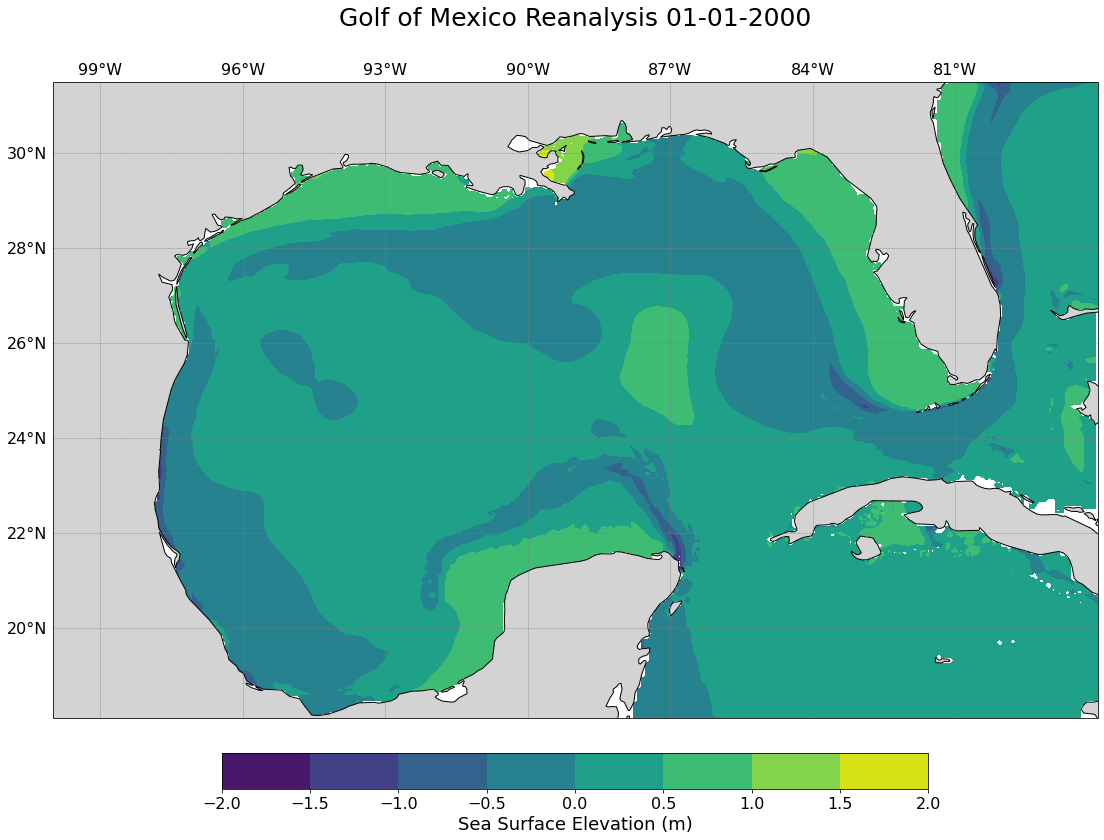

In [42]:
#Creates the type of projection and the area of the projection
fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()))  
ax.set_extent([260,282, 18.11, 31.5])
    
#set variables from the data that will be plotted onto the map
var = data.ssh[0,:,:] 
x, y =data.Longitude, data.Latitude

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree())#,N=7)
  
#Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Sea Surface Elevation (m)" , size = 18)

    #Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='lightgrey')
ax.add_feature(land_50m)

#Sets the graph title and format the size and location of the title
ax.set_title('Golf of Mexico Reanalysis '+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)
    
    ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
        #and sets the grid lines on the graph
    ##Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 16}
gl.ylabel_style = {'size' : 16}

Now that we know what the plot will look like, we need to make alot more!

Before doing that, you need to initialize a few variables such as: 
* How many days we want to plot
* The First day
* The the levels we want 
* Where we want to save our plots
* What is the base title we want to call the plots

In [59]:
#Setting start date: (Make sure to re run this section each time) 
number_of_days = 10 # How many days do we want to cycle through
date = datetime(2000,1,1) 

min_level = -2
#Remember in when coding data goes up to 2, but doesn't include 2, so we do 2.01 so it has the number 2
max_level = 2.01 

levels = np.arange(min_level,max_level,0.1) #We want the range from our min to max incrementing by 0.1

save_location = 'E:/Gulf of Mexico/HYCOM/Sample_output/'
file_name = 'Golf_of_Mexico_Reanalysis_'

Now that we have the basic information for our plots, we can begin making the loop


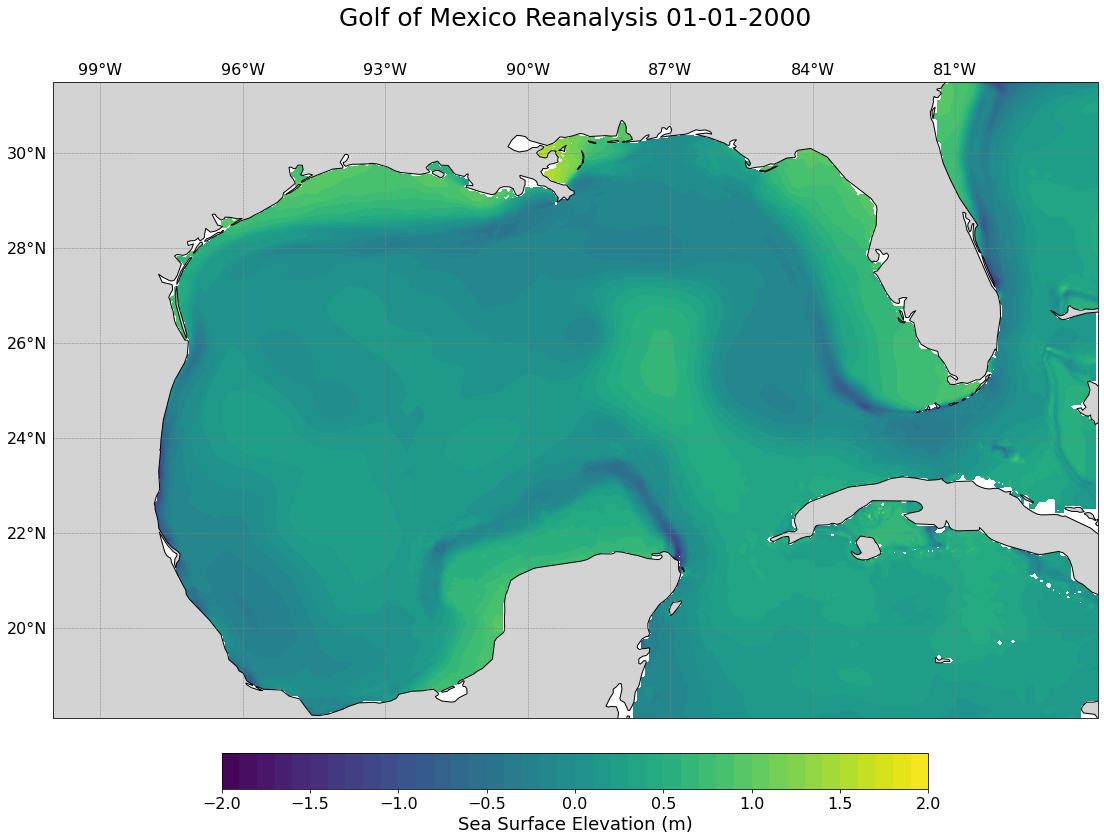

C:\Users\victo\AppData\Local\Temp/ipykernel_25232/638995819.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(save_location + file_name +str(date.strftime("%m-%d-%Y")), bbox_inches='tight', quality = 95, dpi = 500)


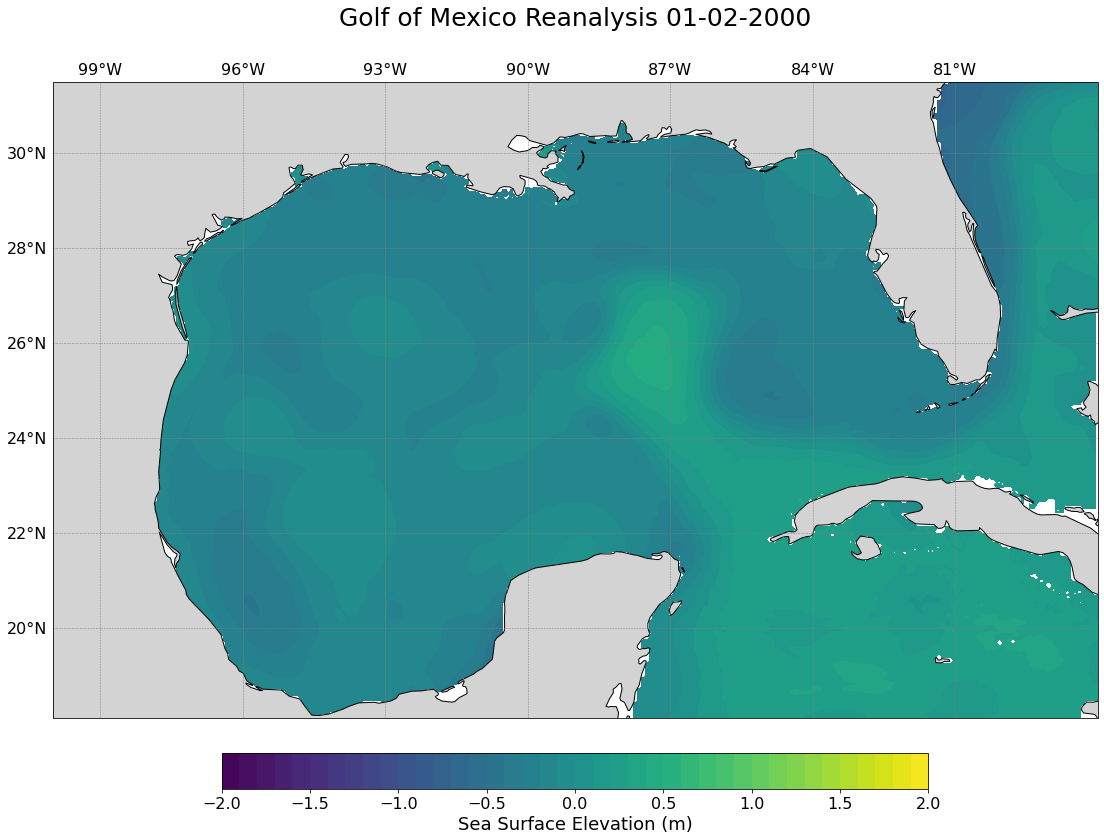

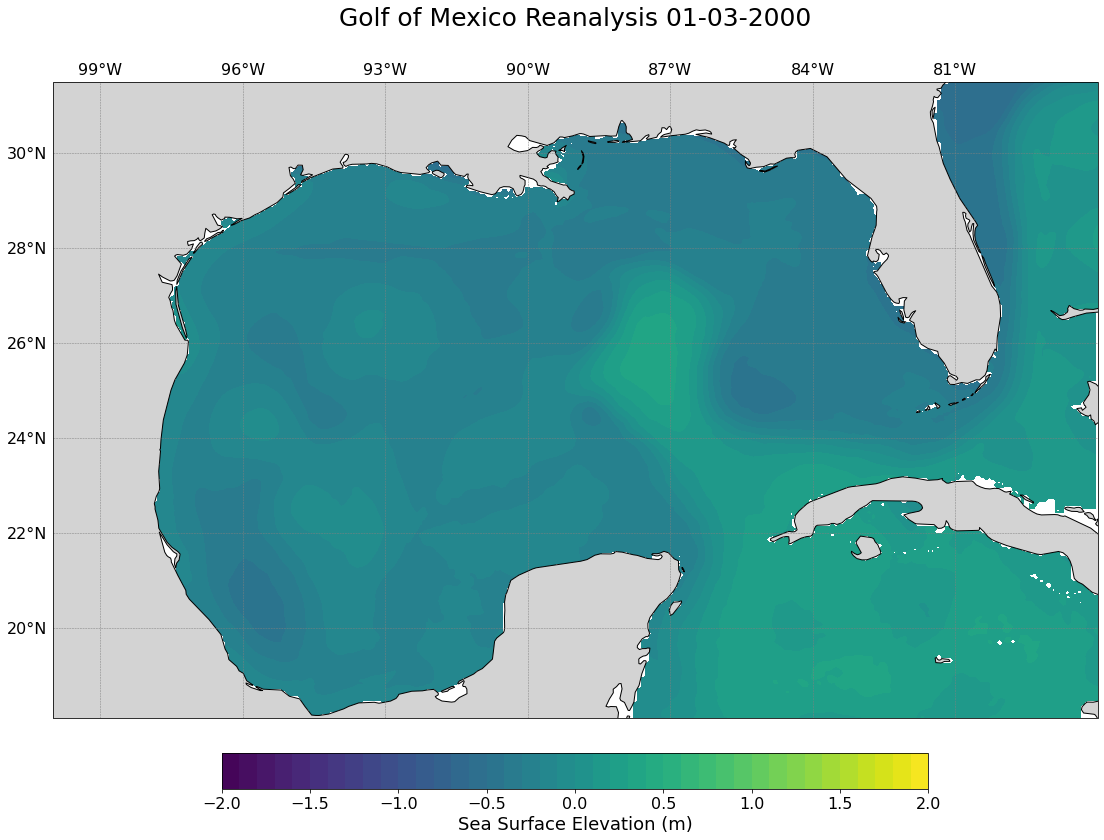

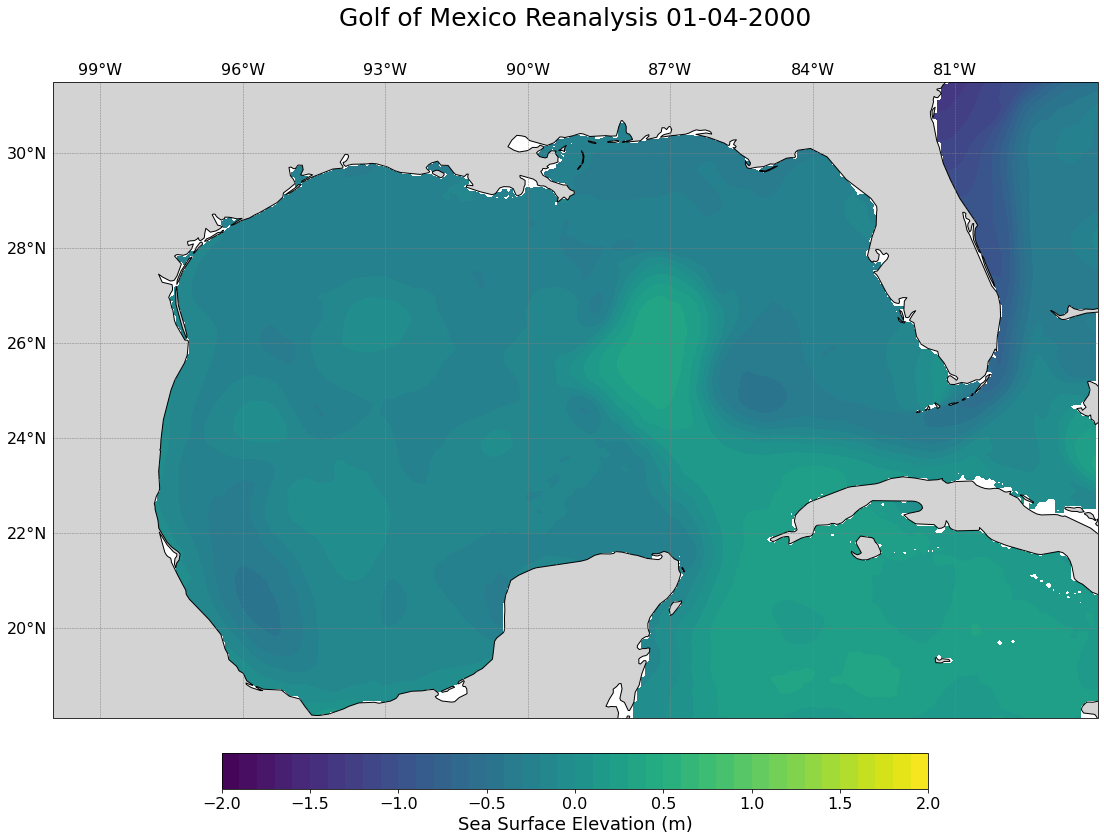

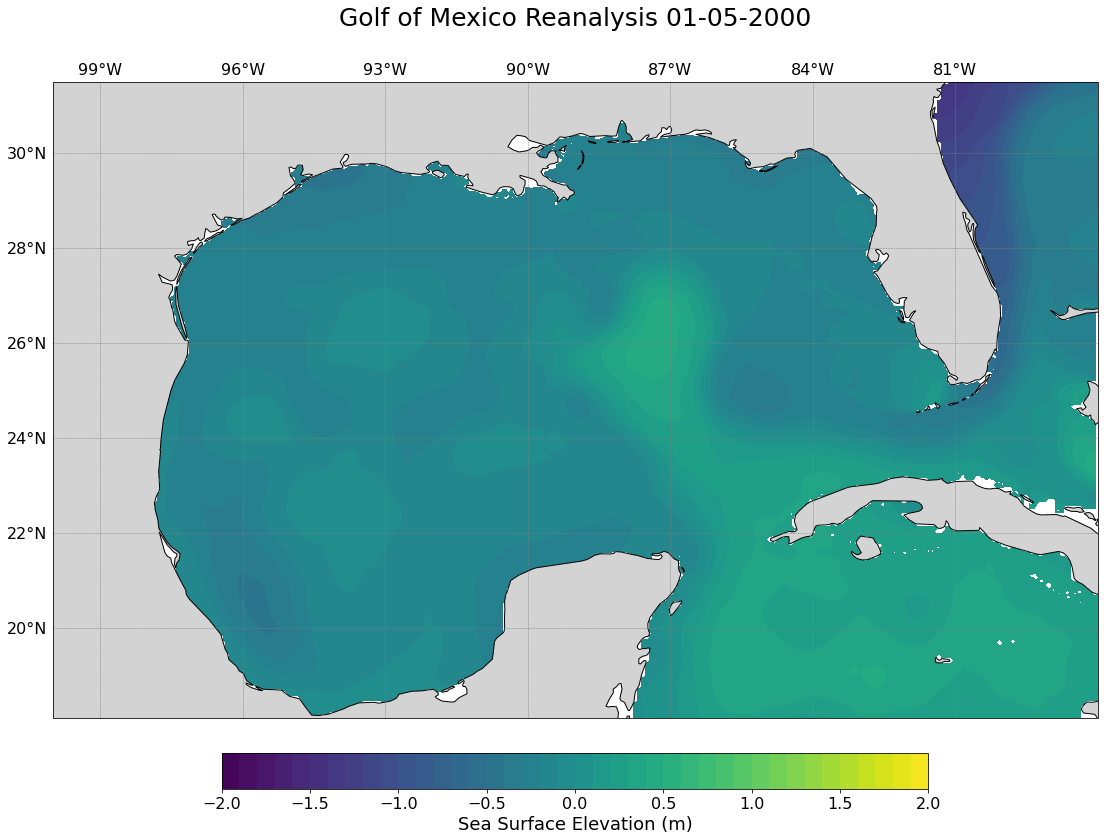

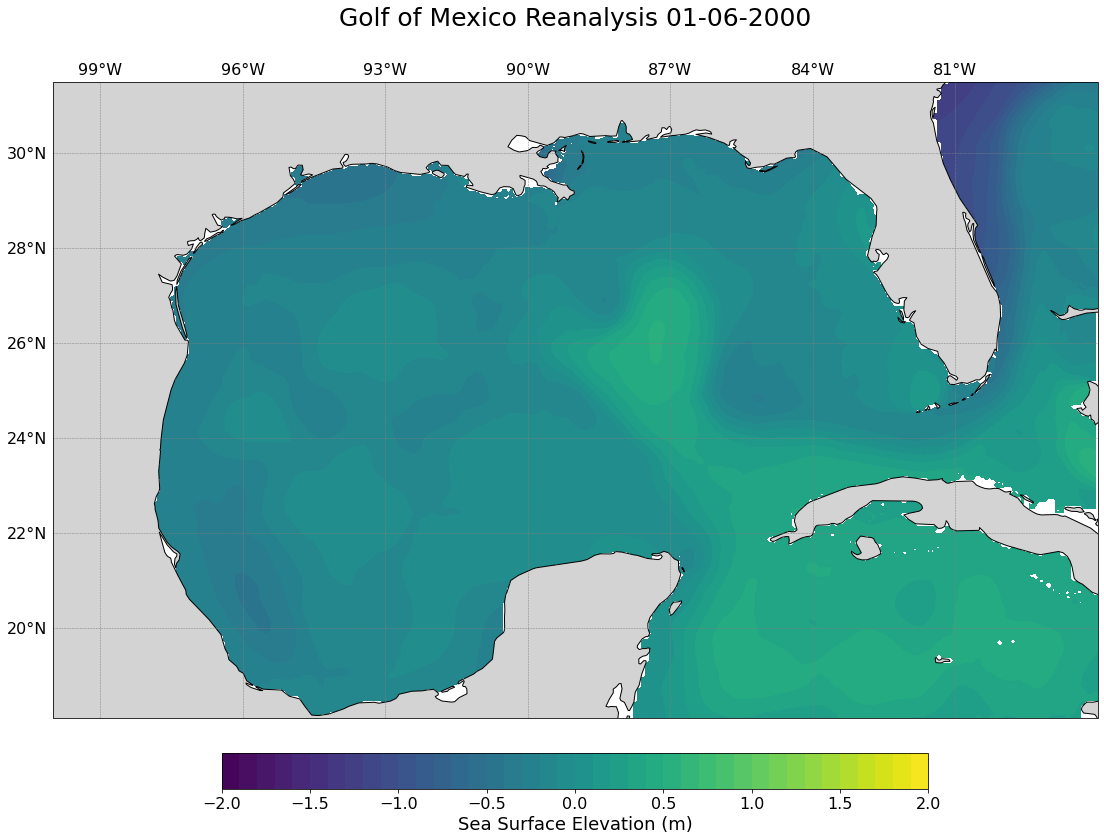

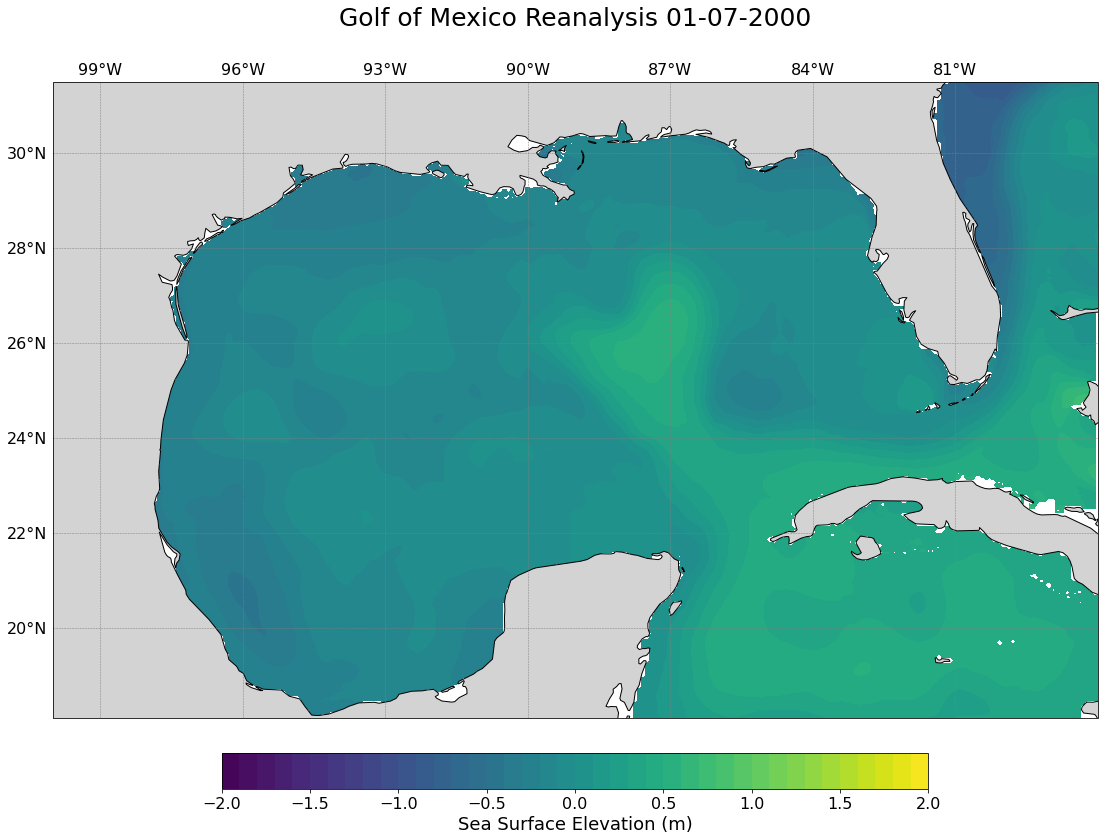

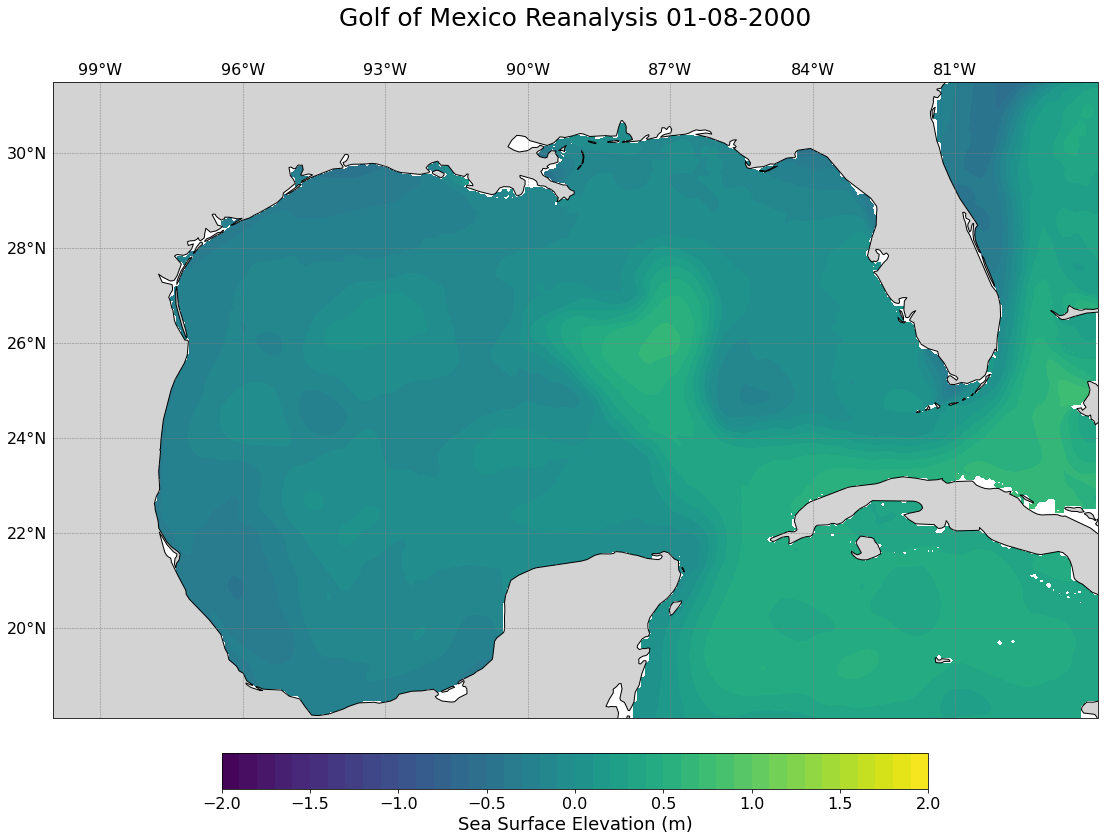

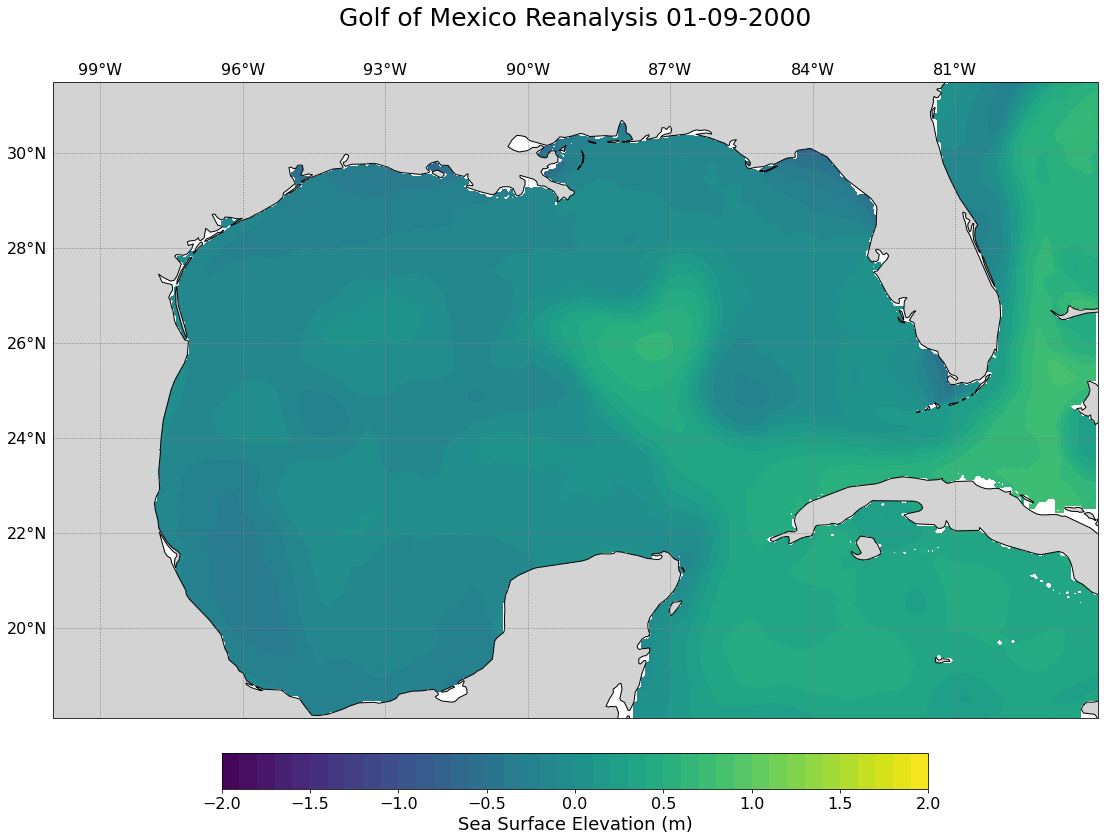

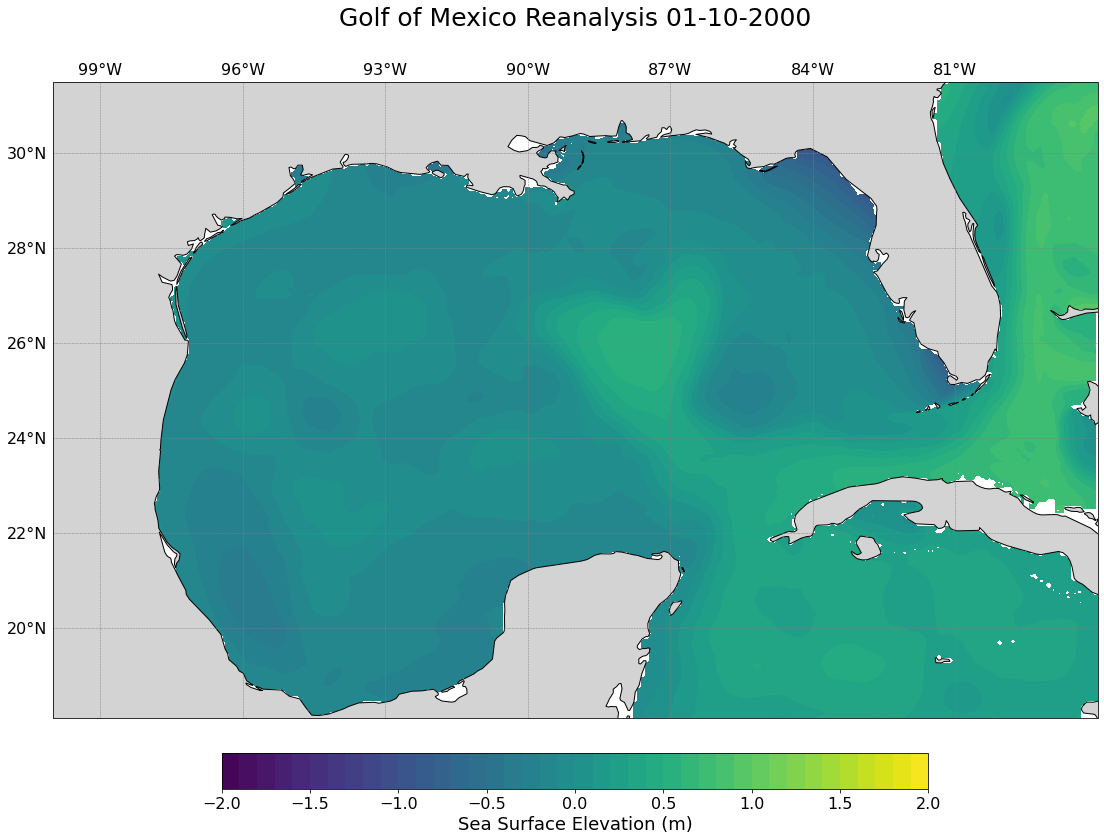

In [58]:
# We start off by looping through the amount of days we want to plot
for date_index in range(1,number_of_days+1):
    #Open open the data for the day that we are looking at 
    link = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2001/020_archv.2001_"+str(date_index).zfill(3)+"_01_2d.nc"
    data = xr.open_dataset(link, decode_times=False)
    
    #Creates the type of projection and the area of the projection
    fig, ax = plt.subplots(figsize =(19,13),subplot_kw=dict(projection=ccrs.PlateCarree()),facecolor='white')  
    ax.set_extent([260,282, 18.11, 31.5])

    #set variables from the data that will be plotted onto the map
    var = data.ssh[0,:,:] 
    x, y =data.Longitude, data.Latitude

    #Contours the data on tho the map projection
    p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(),vmin = min_level, vmax=max_level, levels = levels)#,N=7)

    #Creates colorbar based on the contour 
    cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
    cbar.set_label("Sea Surface Elevation (m)" , size = 18)

        #Sets the land onto the projection with the right color and scale
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='black',
                                            facecolor='lightgrey')
    ax.add_feature(land_50m)

    #Sets the graph title and format the size and location of the title
    ax.set_title('Golf of Mexico Reanalysis '+ str(date.strftime("%m-%d-%Y")), y=1.08, fontsize=25)

        ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
            #and sets the grid lines on the graph
        ##Set the grid lines to another variable so it edits the grid variables and not the whole map
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=.5, color='gray', linestyle='--')
    gl.xlabels_top = True    
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size' : 16}
    gl.ylabel_style = {'size' : 16}
    
    plt.show()
    #Save the plot in the given location and name, with the extension of the date
    fig.savefig(save_location + file_name +str(date.strftime("%m-%d-%Y")), bbox_inches='tight', quality = 95, dpi = 500)
 
    
    #Increment the date, as we go through to the next file so it matches up with the correct time
    date = date + timedelta(days=1)
       

# Make the movies:
In order to make the movies, there are 2 options:
* A gif maker website
* A video editing website 

## Gif Maker:
If you want to use gif maker there are alot of free websites, one commin ine is ezgif: https://ezgif.com/maker

It is straight forward.
1. you open the link
2. drag and drop all of your files
3. After a few minutes you can choose how long you want to wait between frames.
4. then press "Make a GIF!" 
5. Export!

## Video editing website
If you want to use an editing website to be able to have more control over the what you are editing you can make it into a video. There are plenty of free options, the one I use is Davinci Resolve: https://www.blackmagicdesign.com/products/davinciresolve

It may take a while to download so we will go over a quick demo here

1. After downloading and setting up davinci resolve, you will create a new project by pressing the button on the bottom right corner
2. Drag all of the images into the "Media pool" on the lift side of the screen
3. Select all of the images and drag it onto the timeline section
4. Use 'control a' to select every image on the timeline, then right click and press 'change clip duration' and press enter
5. After you like the way the video plays you can export it by pressing 'File' -> 'Quick Export' -> select the file format (h.264 is the basic video option) and then export. After a few minutes the video should be able to be played and sent. 